
# Prediction of Liver Disease

Liver disease is one of the chronic diseases and the number of people suffering from it are increasing day by day due to a large consumption of alcohol, inhalation of harmful gases, intake of contaminated food and drugs. The early diagnosis can help provide treatment before it gets severe and even fatal. Here, machine learning algorithms can play an important role by helping in identifying the patients who may have a liver disease in a very efficient and faster manner.

## Problem Statement:

Identifying the factors that affect the liver of any person and predicting whether the person has a liver disease or not.

## About the dataset:
The dataset of liver patients is obtained from UCI - Machine Learning Repository.
This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. The records are divided into two groups that is, liver patient and non-liver patient which are encoded as 1 and 2 respectively.

## Attribute Information:

1. Age - Age of the patient
2. Gender - Gender of the patient
3. Total Bilirubin
4. Direct Bilirubin
5. Alkaline Phosphotase
6. Alamine Aminotransferase (SGPT)
7. Aspartate Aminotransferase (SGOT)
8. Total Protiens
9. Albumin
10. Ratio Albumin and Globulin Ratio
11. Dataset - Target variable (class)


## Approach
Based on the above dataset, the target is binary thus this is a binary classification problem. In order to build the machine learning models, the data was pre-processed which includes treating the missing values, scaling of the data and feature engineering. The data was divided into train and test sets of ratio 70:30 and trained using various classification algorithms like Logistic Regression, Decision Tree, Naive Bayes, Ensemble Methods. Further, to finalize the model a 10-fold cross validation was performed taking into consideration the evaluation metrics as Recall because in such cases correctly predicting the person actually having the disease is more important.




---



# 1. Importing Required Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('/content/sample_data')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Reading the data

In [2]:

df = pd.read_csv('indian_liver_patient.csv')
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.shape

(583, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


There are a total of 583 records and 11 features. Only one categorical variable (Gender) and 10 numeric variables (int and float)

# 3. Descriptive Statistics

In [5]:
df.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


# 4. Check for null values

In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

There are 4 null values in the feature Albumin_and_Globulin_Ratio. As from the above descriptive statistics, it is observed that the data is almost normal, we can impute these missing values with mean.

In [7]:
## Imputing Missing Values

df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# 5. Check for class imbalance

In [9]:
df['Dataset'].unique()

array([1, 2])

In [10]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [11]:
df['Dataset'].value_counts(normalize = True)

1    0.713551
2    0.286449
Name: Dataset, dtype: float64

# 6. Exploratory Data Analysis

In [12]:


import seaborn as sns
import matplotlib.pyplot as plt

### functions for creating plots
def build_hist_plot(num):
    fig = plt.figure(figsize=(20,50))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/4,i+1)
        sns.distplot(df[num[i]])

    plt.show()

def build_box_plot(num):
    fig = plt.figure(figsize=(20,45))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/4,i+1)
        sns.boxplot(df[num[i]])

    plt.show()
    
def build_count_plot(num):
    fig = plt.figure(figsize=(15,5))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num),i+1)
        sns.countplot(df[num[i]])
        
    plt.show()


In [13]:
### separating the numerical and categorical variables

num_cols = df.select_dtypes(exclude = 'object').columns.tolist()
cat_cols = df.select_dtypes(include = 'object').columns.tolist()

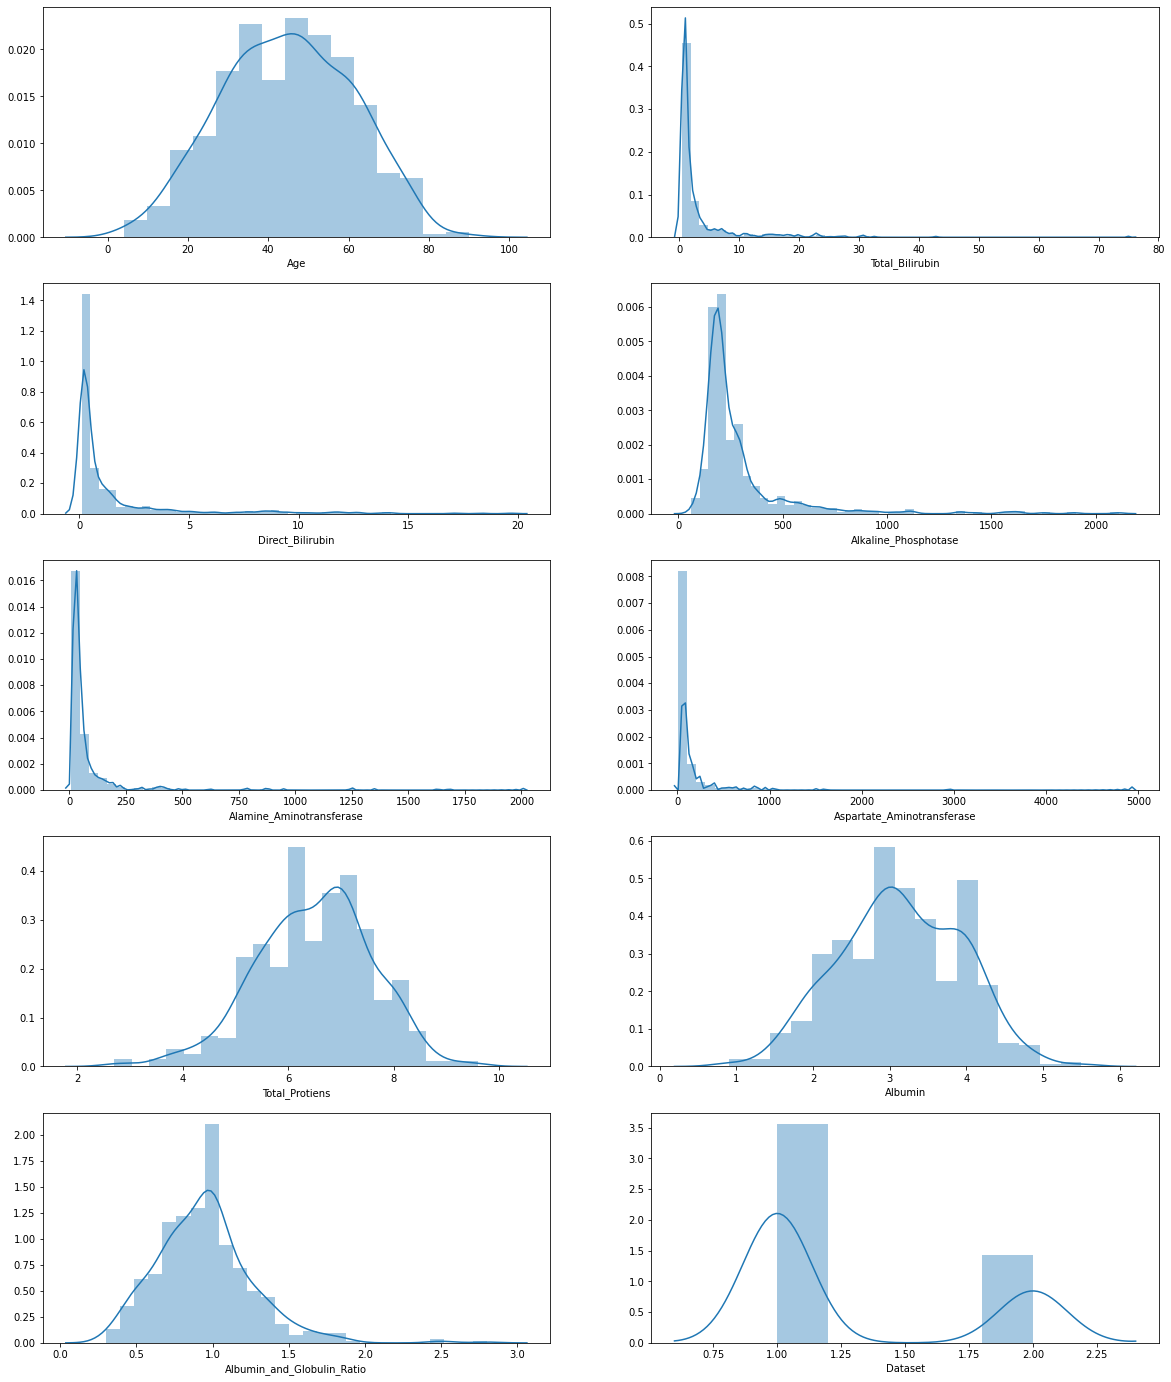

In [14]:
build_hist_plot(num_cols)

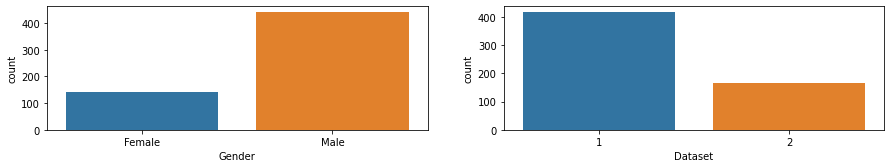

In [15]:
build_count_plot(['Gender','Dataset'])

## Observations:

1. The numerical features like total_bilirubin, direct_bilirubin, alkaline aminotransferase, alamine aminotramsferase are left skewed.

2. The records consists of more male patients than female patients.

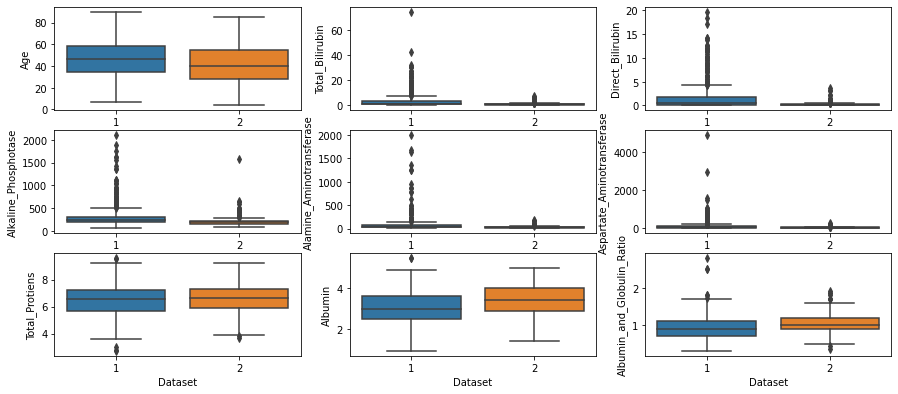

In [16]:
def build_box_plot(num):
    fig = plt.figure(figsize=(15,20))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/3,i+1)
        sns.boxplot(df['Dataset'], df[num[i]])
        
    plt.show()
    
build_box_plot(num_cols[:-1])

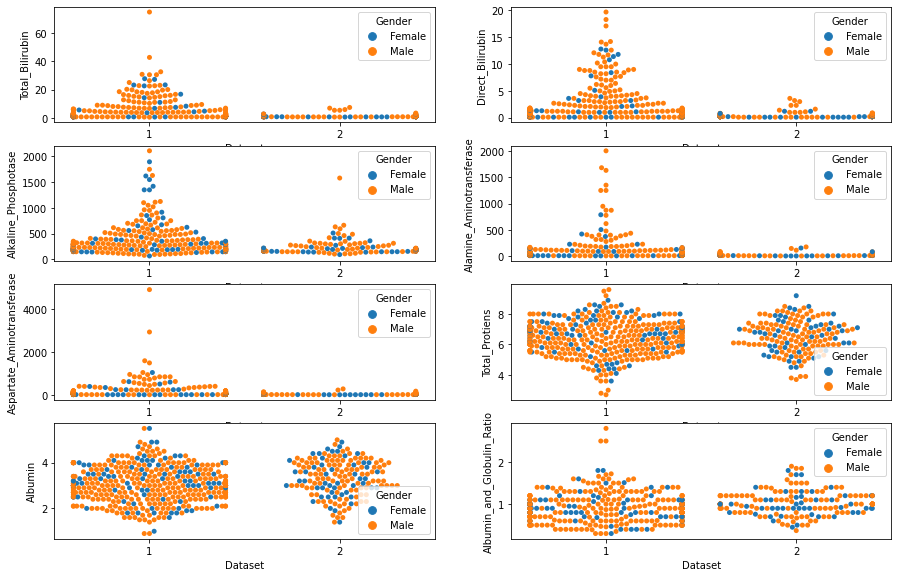

In [17]:
def build_swarm_plot(num):
    fig = plt.figure(figsize=(15,20))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/3,i+1)
        sns.swarmplot(df['Dataset'], df[num[i]], hue = df['Gender'])
        
    plt.show()
    
build_swarm_plot(num_cols[1:-1])

## Observations:

1. The patients labelled as 1 (having liver disease) have high amount of total_bilirubin, direct_bilirubin, alkaline aminotransferase, alamine aminotramsferase enzymes in their blood.

2. The levels of the enzymes and proteins in males is much higher than females who have the liver disease.

3. The males suffer more from liver disease than females.


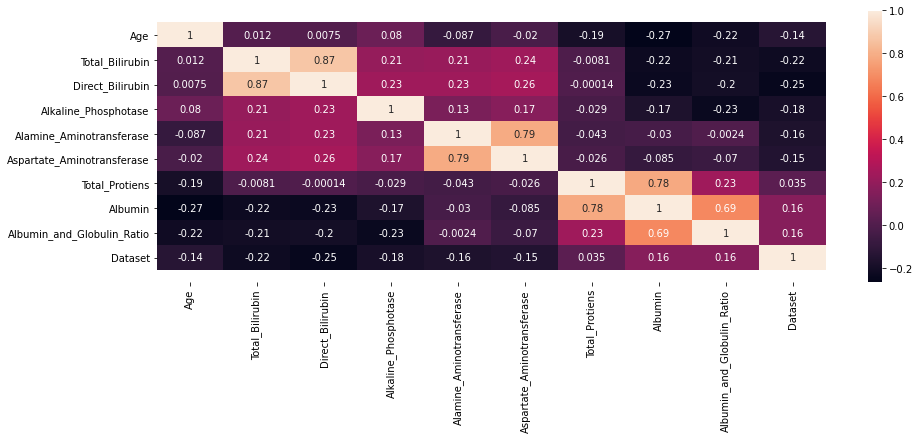

In [18]:
plt.figure(figsize = (15,5))
x = sns.heatmap(df.corr(), annot = True)
b, t = x.get_ylim()
x.set_ylim(b + 0.5, t - 0.5)
plt.show()

In [19]:
df[df['Gender']=='Female']['Age'].mean(), df[df['Gender']=='Male']['Age'].mean()

(43.13380281690141, 45.265306122448976)

# Statistical Significance

In [23]:
from scipy.stats import mannwhitneyu, chi2_contingency

def perform_two_sample_ttest(col):
    t, pvalue = mannwhitneyu(df[df['Dataset']==0][col], df[df['Dataset']==1][col])
    print('{}: {}'.format(col, pvalue))
    
for i in num_cols[:-1]:
    perform_two_sample_ttest(i)


Age: 0.0
Total_Bilirubin: 0.0
Direct_Bilirubin: 0.0
Alkaline_Phosphotase: 0.0
Alamine_Aminotransferase: 0.0
Aspartate_Aminotransferase: 0.0
Total_Protiens: 0.0
Albumin: 0.0
Albumin_and_Globulin_Ratio: 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


In [24]:
def perform_chisquare(col):
    t, pvalue, dof, exp = chi2_contingency(pd.crosstab(df[col],df['Dataset']))
    print('{}: {}'.format(col, pvalue))
    
for i in df.select_dtypes(include = 'object').columns.tolist():
    perform_chisquare(i)

Gender: 0.059665846857774464


In [25]:
df = df.rename(columns = {'Dataset':'target'})

In [26]:
df['target'] = df['target'].map({1:1, 2:0})

In [27]:
df['target'].value_counts()

1    416
0    167
Name: target, dtype: int64

In [28]:
## Categorical to Numerical

ndf = pd.get_dummies(df, drop_first = True)
ndf.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


# Model Building

In [29]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.feature_selection import RFECV

from sklearn.model_selection import GridSearchCV, validation_curve, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score,roc_auc_score, roc_curve, auc, precision_score,recall_score

In [30]:

# train test split
def perform_train_test_split(x,y,size):
    return train_test_split(x, y, test_size = size, random_state = 0)

# function for scaling the data for train test split
def std_data(xtrain,xtest):
    sc = StandardScaler()
    scaled = sc.fit(xtrain)
    scaled_train = sc.transform(xtrain)
    scaled_test = sc.transform(xtest)
    return scaled_train, scaled_test

# function to scale whole data
def std_data_n(x):
    sc = StandardScaler()
    scaled = sc.fit_transform(x)
    return scaled


# creating an empty dataframe with headers
headers=['AUC Train','AUC Test','Acc Train','Acc Test','Pre Train','Pre Test','Re Train','Re Test']
dfObj = pd.DataFrame(columns = headers)

# function to get roc_auc_scores for train and test  
def fit_predict_plot(xtrain,xtest,ytrain,ytest,models):
    
    for name, model in models:
        print(name)
        model.fit(xtrain,ytrain)
        
        y_pred_train = model.predict(xtrain)
        y_pred_test = model.predict(xtest)
        
        probas_train = model.predict_proba(xtrain)[:,1]
        probas_test = model.predict_proba(xtest)[:,1]

        model_name = name 
        
        #plot_roc_auc_curve(probas_train,probas_test,ytrain,ytest,name)
        
        return get_metrics(ytrain,ytest,y_pred_train,y_pred_test,probas_train,probas_test,model_name)
    
# function to get roc_auc_scores for train and test  
def fit_predict_plot1(xtrain,xtest,ytrain,ytest,model):
    
        print(model[0])
        model.fit(xtrain,ytrain)
        
        y_pred_train = model[1].predict(xtrain)
        y_pred_test = model[1].predict(xtest)
        
        probas_train = model[1].predict_proba(xtrain)[:,1]
        probas_test = model[1].predict_proba(xtest)[:,1]

        model_name = model[0] 
        
        #plot_roc_auc_curve(probas_train,probas_test,ytrain,ytest,name)
        
        return get_metrics(ytrain,ytest,y_pred_train,y_pred_test,probas_train,probas_test,model_name)
    
# function to get all other metrics
def get_metrics(y_train,y_test,y_pred_train,y_pred_test,probas_train,probas_test,name):
        global dfObj
        print('Confusion Matrix:\n')
        print('For Train Data:\n')
        print(confusion_matrix(y_train,y_pred_train))
        #print('Classification Report:\n',classification_report(y_train,y_pred_train))
        
        print('\n For Test Data:\n')
        print(confusion_matrix(y_test,y_pred_test))
        #print('Classification Report:\n',classification_report(y_test,y_pred_test))

        dfObj.loc[name] = [roc_auc_score(y_train,probas_train), roc_auc_score(y_test,probas_test),
                           accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test),
                           precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test),
                           recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)]
        return dfObj
    


In [31]:
## Models 
KNN = KNeighborsClassifier()
LogReg = LogisticRegression(max_iter = 1000, random_state = 21)
DT  = DecisionTreeClassifier(random_state = 21)
RF = RandomForestClassifier(random_state = 21)



In [32]:
## Splitting the data into train and test sets

X = ndf.drop(['target'], axis = 1)
Y = ndf['target']

X_train, X_test, y_train, y_test = perform_train_test_split(X, Y, 0.3)

scaled_train, scaled_test = std_data(X_train,X_test)

In [33]:
## Model 1: KNN

models = [('KNN',KNN)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)

KNN
Confusion Matrix:

For Train Data:

[[ 59  55]
 [ 32 262]]

 For Test Data:

[[13 40]
 [25 97]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.835109,0.602846,0.786765,0.628571,0.826498,0.708029,0.891156,0.795082


In [34]:
## Model 2: Logistic Regression

models = [('LogReg',LogReg)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)



LogReg
Confusion Matrix:

For Train Data:

[[ 26  88]
 [ 16 278]]

 For Test Data:

[[  9  44]
 [ 11 111]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.835109,0.602846,0.786765,0.628571,0.826498,0.708029,0.891156,0.795082
LogReg,0.770438,0.746056,0.745098,0.685714,0.759563,0.716129,0.945578,0.909836


In [35]:
## Model 3: Decision Tree
models = [('DT',DT)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)



DT
Confusion Matrix:

For Train Data:

[[114   0]
 [  0 294]]

 For Test Data:

[[19 34]
 [29 93]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.835109,0.602846,0.786765,0.628571,0.826498,0.708029,0.891156,0.795082
LogReg,0.770438,0.746056,0.745098,0.685714,0.759563,0.716129,0.945578,0.909836
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.000000,0.762295


In [36]:
## Model 4: Random Forest

models = [('RF',RF)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)

RF
Confusion Matrix:

For Train Data:

[[114   0]
 [  0 294]]

 For Test Data:

[[ 12  41]
 [ 14 108]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.835109,0.602846,0.786765,0.628571,0.826498,0.708029,0.891156,0.795082
LogReg,0.770438,0.746056,0.745098,0.685714,0.759563,0.716129,0.945578,0.909836
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.000000,0.762295
RF,1.000000,0.728812,1.000000,0.685714,1.000000,0.724832,1.000000,0.885246


Here, evaluation metric considered is Recall to compare the models built.
From the above scores of train and test sets, it is observed that there is high variance and also there is some sort of class imbalance as the proportion of people not having the disease is low, also we have high values for false positives and negatives.

# SMOTE Analysis

In [37]:
from imblearn.over_sampling import SMOTE

X = ndf.drop('target', axis = 1)
y = ndf['target']

# transform the dataset
oversample = SMOTE(sampling_strategy = 0.50)
X_smote, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [38]:
## Splitting the data into train and test sets

X = X_smote
Y = y

X_train, X_test, y_train, y_test = perform_train_test_split(X, Y, 0.3)

scaled_train, scaled_test = std_data(X_train,X_test)



In [39]:
## Model 1: KNN

models = [('KNN',KNN)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)



KNN
Confusion Matrix:

For Train Data:

[[ 87  53]
 [ 37 259]]

 For Test Data:

[[27 41]
 [27 93]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.850181,0.706801,0.793578,0.638298,0.830128,0.694030,0.875000,0.775000
LogReg,0.770438,0.746056,0.745098,0.685714,0.759563,0.716129,0.945578,0.909836
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.000000,0.762295
RF,1.000000,0.728812,1.000000,0.685714,1.000000,0.724832,1.000000,0.885246


In [40]:
## Model 2: Logistic Regression

models = [('LogReg',LogReg)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)


LogReg
Confusion Matrix:

For Train Data:

[[ 43  97]
 [ 31 265]]

 For Test Data:

[[ 21  47]
 [ 12 108]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.850181,0.706801,0.793578,0.638298,0.830128,0.694030,0.87500,0.775000
LogReg,0.767978,0.770588,0.706422,0.686170,0.732044,0.696774,0.89527,0.900000
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.00000,0.762295
RF,1.000000,0.728812,1.000000,0.685714,1.000000,0.724832,1.00000,0.885246


In [41]:
## Model 3: Random Forest

models = [('RF',RF)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)

RF
Confusion Matrix:

For Train Data:

[[140   0]
 [  0 296]]

 For Test Data:

[[ 31  37]
 [ 17 103]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.850181,0.706801,0.793578,0.638298,0.830128,0.694030,0.87500,0.775000
LogReg,0.767978,0.770588,0.706422,0.686170,0.732044,0.696774,0.89527,0.900000
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.00000,0.762295
RF,1.000000,0.808088,1.000000,0.712766,1.000000,0.735714,1.00000,0.858333


In [42]:
train = pd.DataFrame(X_smote, columns = ndf.drop('target', axis = 1).columns.tolist())
y = pd.Series(y)

In [43]:
train.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0.0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

# Feature Selection

In [45]:
## 1. Removing highly correlated features

features = ['Direct_Bilirubin','Total_Protiens','Albumin']

X = train
Y = y

## Splitting the data into train and test sets
X_train, X_test, y_train, y_test = perform_train_test_split(X, Y, 0.3)

scaled_train, scaled_test = std_data(X_train,X_test)

In [46]:
## Model 1: KNN

models = [('KNN',KNN)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)

KNN
Confusion Matrix:

For Train Data:

[[ 87  53]
 [ 37 259]]

 For Test Data:

[[27 41]
 [27 93]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.850181,0.706801,0.793578,0.638298,0.830128,0.694030,0.87500,0.775000
LogReg,0.767978,0.770588,0.706422,0.686170,0.732044,0.696774,0.89527,0.900000
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.00000,0.762295
RF,1.000000,0.808088,1.000000,0.712766,1.000000,0.735714,1.00000,0.858333


In [47]:

## Model 2: Logistic Regression

models = [('LogReg',LogReg)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)

LogReg
Confusion Matrix:

For Train Data:

[[ 43  97]
 [ 31 265]]

 For Test Data:

[[ 21  47]
 [ 12 108]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.850181,0.706801,0.793578,0.638298,0.830128,0.694030,0.87500,0.775000
LogReg,0.767978,0.770588,0.706422,0.686170,0.732044,0.696774,0.89527,0.900000
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.00000,0.762295
RF,1.000000,0.808088,1.000000,0.712766,1.000000,0.735714,1.00000,0.858333


In [48]:
## Model 3: Random Forest

models = [('RF',RF)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)

RF
Confusion Matrix:

For Train Data:

[[140   0]
 [  0 296]]

 For Test Data:

[[ 31  37]
 [ 17 103]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.850181,0.706801,0.793578,0.638298,0.830128,0.694030,0.87500,0.775000
LogReg,0.767978,0.770588,0.706422,0.686170,0.732044,0.696774,0.89527,0.900000
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.00000,0.762295
RF,1.000000,0.808088,1.000000,0.712766,1.000000,0.735714,1.00000,0.858333


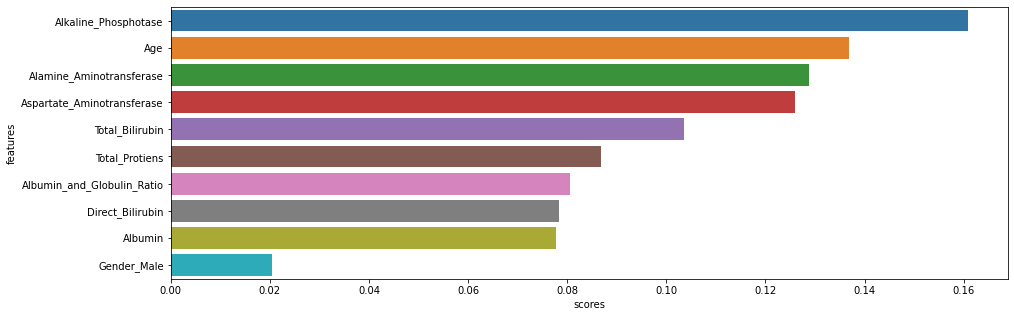

In [49]:
### 2. Feature Imprtance

imp_features = pd.DataFrame({'features': X_train.columns, 'scores':  RF.feature_importances_})
imp_features = imp_features.sort_values(by = 'scores', ascending = False)

plt.figure(figsize = (15,5))
sns.barplot(x = 'scores', y = 'features', data = imp_features)
plt.show()

In [51]:
## using top 5 features

X = train[imp_features['features'][:5]]
Y = y

## Splitting the data into train and test sets
X_train, X_test, y_train, y_test = perform_train_test_split(X, Y, 0.3)

scaled_train, scaled_test = std_data(X_train,X_test)

models = [('top 5 + RF',RF)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)

top 5 + RF
Confusion Matrix:

For Train Data:

[[140   0]
 [  0 296]]

 For Test Data:

[[ 36  32]
 [ 19 101]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.850181,0.706801,0.793578,0.638298,0.830128,0.694030,0.87500,0.775000
LogReg,0.767978,0.770588,0.706422,0.686170,0.732044,0.696774,0.89527,0.900000
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.00000,0.762295
RF,1.000000,0.808088,1.000000,0.712766,1.000000,0.735714,1.00000,0.858333
top 5 + RF,1.000000,0.792647,1.000000,0.728723,1.000000,0.759398,1.00000,0.841667


# Hyperparameter Tuning
## Tuning RF

In [70]:

## parameters for RF
max_depth = np.arange(2,10)
min_samples_split = np.arange(10,40)
min_samples_leaf = np.arange(10,20)
n_estimators = np.arange(70,80)

params = {
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'n_estimators' : n_estimators
         }

RF  = RandomForestClassifier(random_state = 21)

rscv = RandomizedSearchCV(RF, params, scoring = 'recall', cv = 5, return_train_score = True)
results = rscv.fit(X_train,y_train)
print(results.best_params_)

{'n_estimators': 79, 'min_samples_split': 11, 'min_samples_leaf': 14, 'max_depth': 3}



## Parameters after each iteration of RandomizedSearchCV

- 1
{n_estimators': ,44 'min_samples_split': 29, 'min_samples_leaf': 10, 'max_depth': 2} - Recall (train: 96, test: 95)

- 2
{'n_estimators': 26, 'min_samples_split': 27, 'min_samples_leaf': 13, 'max_depth': 2} - Recall (train: 95.9, test: 95.8)

- 3
{'n_estimators': 13, 'min_samples_split': 37, 'min_samples_leaf': 12, 'max_depth': 2} - Recall (train: 95.2, test: 95)

- 4
{'n_estimators': 45, 'min_samples_split': 33, 'min_samples_leaf': 17, 'max_depth': 8} - Recall (train: 91.8, test: 90)

- 5
{'n_estimators': 55, 'min_samples_split': 13, 'min_samples_leaf': 11, 'max_depth': 3} - Recall(train: 91.8 , test: 90 )

- 6
{'n_estimators': 69, 'min_samples_split': 24, 'min_samples_leaf': 10, 'max_depth': 2} - Recall(train: 97.6, test: 96.6)

- 7
{'n_estimators': 83, 'min_samples_split': 26, 'min_samples_leaf': 12, 'max_depth': 2} - Recall(train: 96.2 , test: 95)

- 8 
{'n_estimators': 79, 'min_samples_split': 11, 'min_samples_leaf': 14, 'max_depth': 3} - Recall (train: 92.2 , test: 91.6)

In [75]:
tunedRF1 = RandomForestClassifier(n_estimators = 44, min_samples_split = 29, min_samples_leaf = 10, 
                                 max_depth = 2, random_state = 21)

tunedRF2 = RandomForestClassifier(n_estimators = 69, min_samples_split = 24, min_samples_leaf = 10, 
                                 max_depth = 2, random_state = 21)


In [89]:
models = [('top 5 + RF1',tunedRF1)]

fit_predict_plot(scaled_train, scaled_test, y_train, y_test, models)

top 5 + RF1
Confusion Matrix:

For Train Data:

[[ 27 113]
 [ 10 286]]

 For Test Data:

[[ 12  56]
 [  6 114]]


,AUC Train,AUC Test,Acc Train,Acc Test,Pre Train,Pre Test,Re Train,Re Test
KNN,0.850181,0.706801,0.793578,0.638298,0.830128,0.694030,0.875000,0.775000
LogReg,0.767978,0.770588,0.706422,0.686170,0.732044,0.696774,0.895270,0.900000
DT,1.000000,0.560393,1.000000,0.640000,1.000000,0.732283,1.000000,0.762295
RF,1.000000,0.808088,1.000000,0.712766,1.000000,0.735714,1.000000,0.858333
top 5 + RF,1.000000,0.792647,1.000000,0.728723,1.000000,0.759398,1.000000,0.841667
top 5 + RF (Tuned),0.819208,0.769853,0.747706,0.675532,0.758333,0.683230,0.922297,0.916667
top 5 + RF1,0.791180,0.766483,0.717890,0.670213,0.716792,0.670588,0.966216,0.950000


# Cross Validation

In [84]:
# function for applying various models with 10-fold cross validation
def implement_cv(x,y,models):
    final = {}
    results = []
    names = []
    auc = []
    for name, model in models:
          kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
          cv_results = model_selection.cross_val_score(model,x,y,cv=kfold, scoring='recall')
          results.append((np.abs(cv_results)))
          auc.append(np.mean(results))
          names.append(name)
          final.update({'Model': names , 'recall': auc})
    return pd.DataFrame(final)

In [85]:
X = train[imp_features['features'][:5]]
Y = y

In [86]:
models = [('top 5 + RF1 (Tuned)',tunedRF1)]
implement_cv(X,Y, models)

,Model,recall
0,top 5 + RF1 (Tuned),0.862497


In [87]:
models = [('top 5 + RF2 (Tuned)',tunedRF2)]
implement_cv(X,Y, models)

,Model,recall
0,top 5 + RF2 (Tuned),0.859762


# Results:

From the cross validation scores, it is evident that the final model for predicting the liver disease is Random forest with 86% recall on whole dataset. That is the model is able to predict 86% of records correctly as having the disease who actually have the disease. The confusion matrix also showed low False Negatives (6).

# Improvements:
The current RF model is producing high false positives which indicates that the person who does not have a disease is predicted to have the disease. This is a false indication which needs to be reduced to avoid any further consequences.

The model can be further improved to reducing the number of false negatives so as to make the model more robust and efficient. Also, other algorithms can be used. The false positives can be reduced by adding more records labelled as non-liver patient.